In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import tensorflow as tf
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt
import cv2
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [40]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
from model.bilinear_cnn import BilinearCnn
fine_tune_dir = "/data/bcnn_stage2"

bcnn = BilinearCnn(is_training=False, fine_tuning=False)
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint(fine_tune_dir))

logits shape:Tensor("fc-layer/fully_connected/BiasAdd:0", shape=(?, 100), dtype=float32)
INFO:tensorflow:Restoring parameters from /data/bcnn_stage2/bilinear_5209.ckpt


In [38]:
from glob import glob
test_imgs = sorted(glob("pictures/*.jpg"))

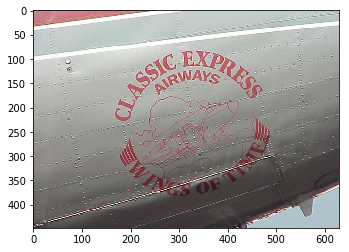

In [4]:
def get_processed_img(img_path):
    img_pil = Image.open(img_path)
    width, height = img_pil.size
    img_cropped = img_pil.crop((0,0,width,height-20))
    imgresized = img_cropped.resize((630, 448), Image.ANTIALIAS)
    return imgresized

img0 = get_processed_img(test_imgs[0])

plt.imshow(img0)
plt.show()

In [5]:
weights_value = 'fc-layer/fully_connected/weights:0'
fc_weights = sess.run(weights_value)

In [7]:
pred, conv5_3, z_value = bcnn.detail_info(sess, np.array(img0).astype(np.float32))
weights_for_pred = fc_weights[:,pred] # [262144]
#bcnn.infer(sess, np.array(img1).astype(np.float32))

In [24]:

def draw_heatmap(img):
    resized_img = img.resize((630, 448), Image.ANTIALIAS)
    class_name = bcnn.infer(sess, np.array(resized_img).astype(np.float32))
    pred, conv5_3, z_value = bcnn.detail_info(sess, np.array(resized_img).astype(np.float32))
    weights_for_pred = fc_weights[:, pred]
    
    activation_map1 = conv5_3[...,26][0]
    activation_map2 = conv5_3[...,27][0]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
    axes[0].set_title("activation 1")
    axes[0].imshow(cv2.resize(activation_map1, (448, 448)), cmap="jet")
    axes[0].imshow(img.resize((448, 448), Image.ANTIALIAS), alpha=0.5)

    axes[1].set_title("activation 2")
    axes[1].imshow(cv2.resize(activation_map2, (448,448)), cmap="jet")
    axes[1].imshow(img.resize((448, 448), Image.ANTIALIAS), alpha=0.5)

    axes[2].imshow(img.resize((448, 448), Image.ANTIALIAS))
    axes[2].set_title(class_name)

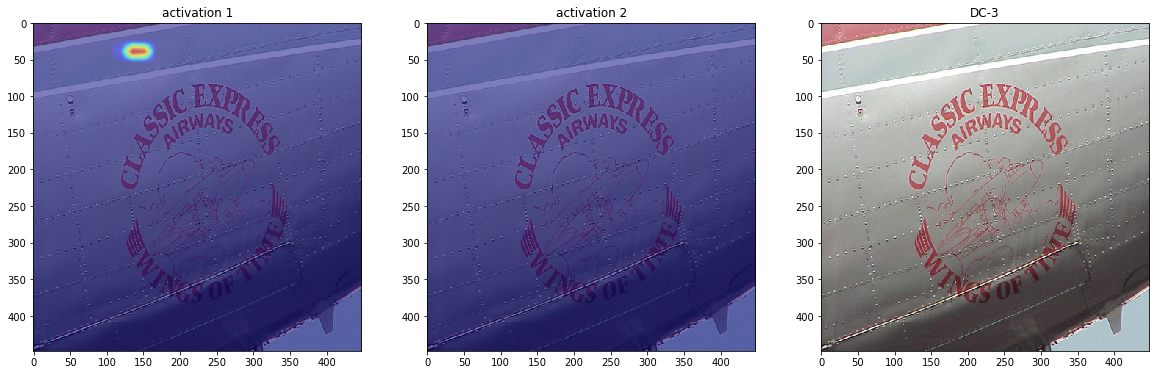

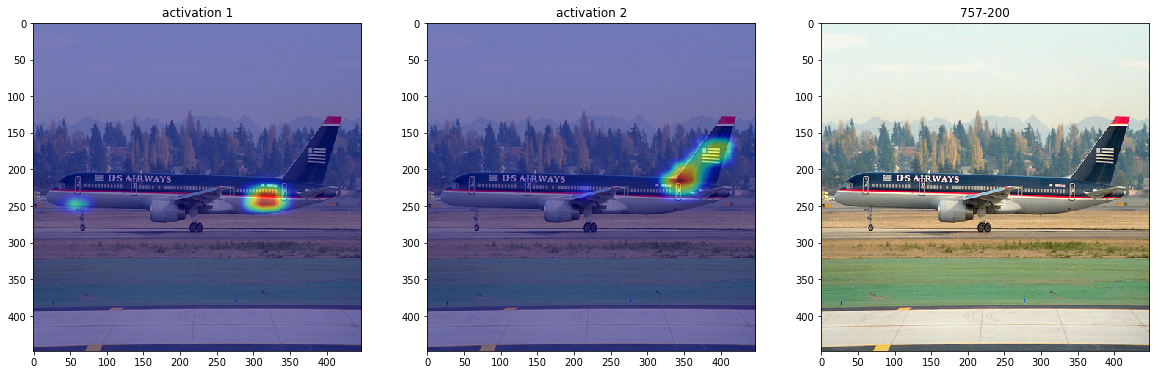

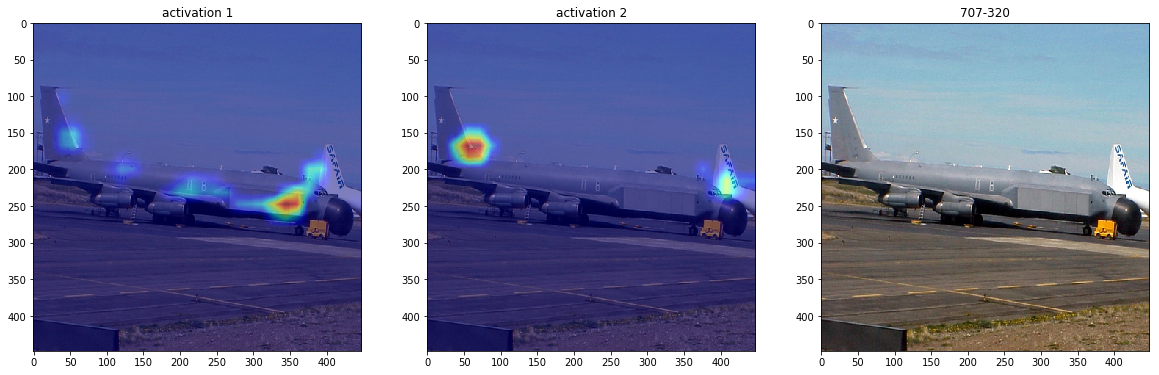

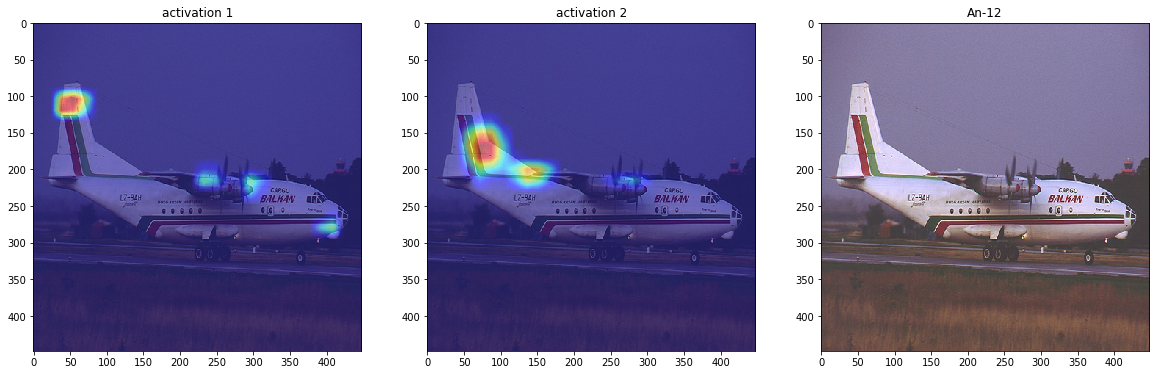

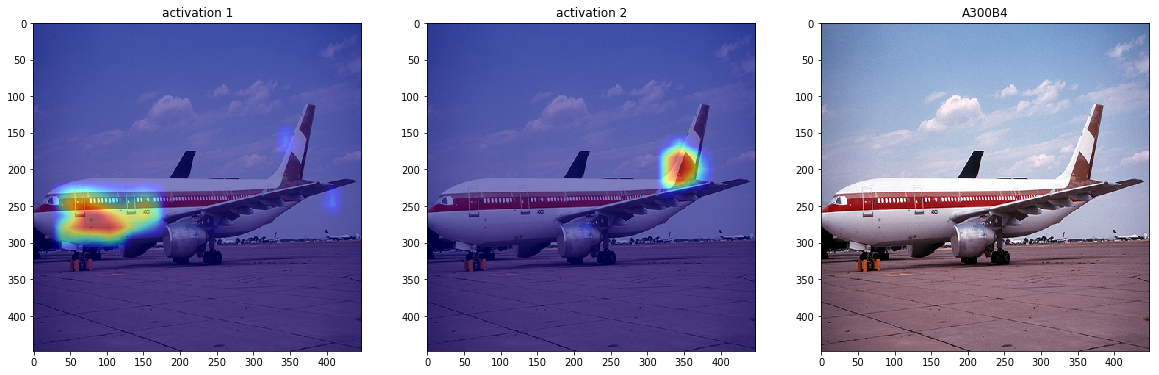

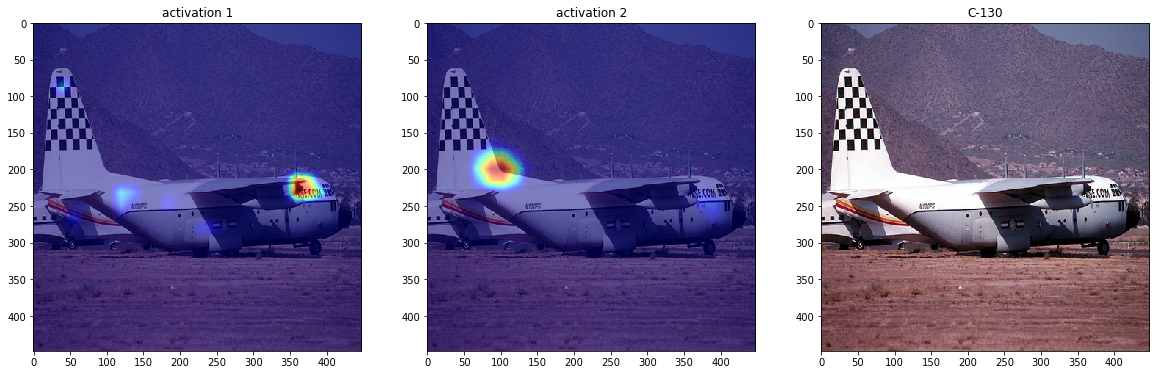

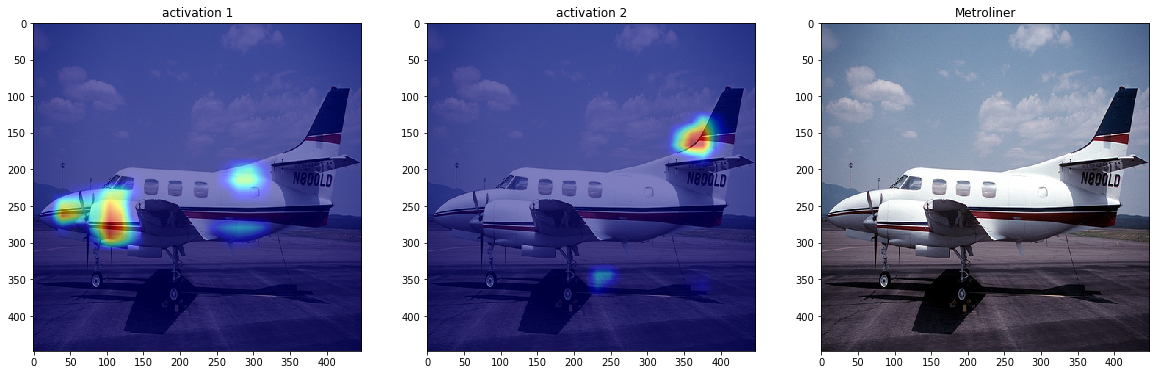

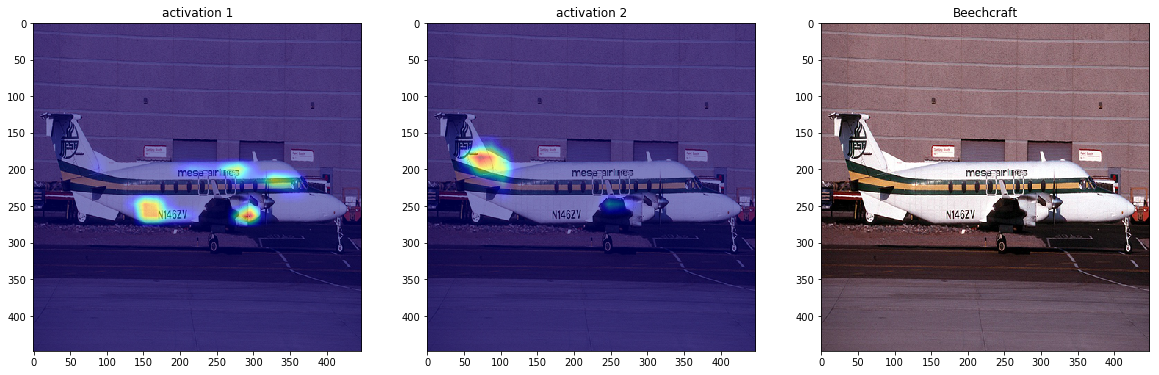

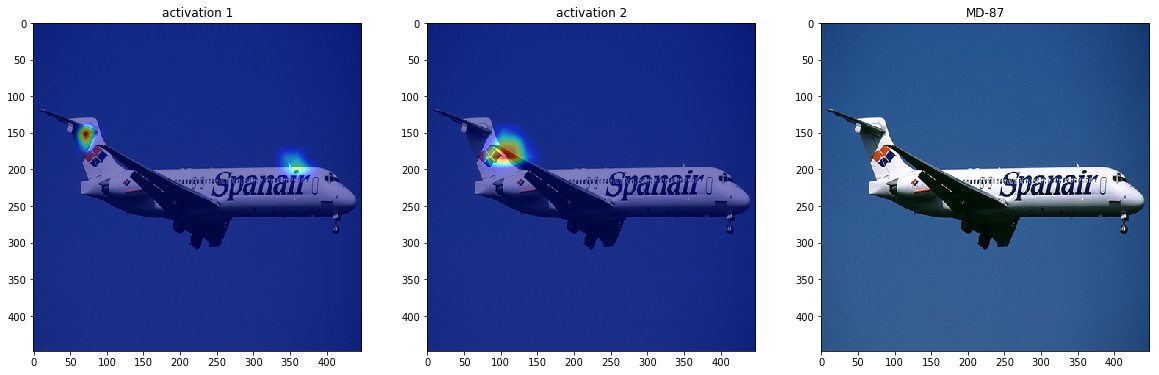

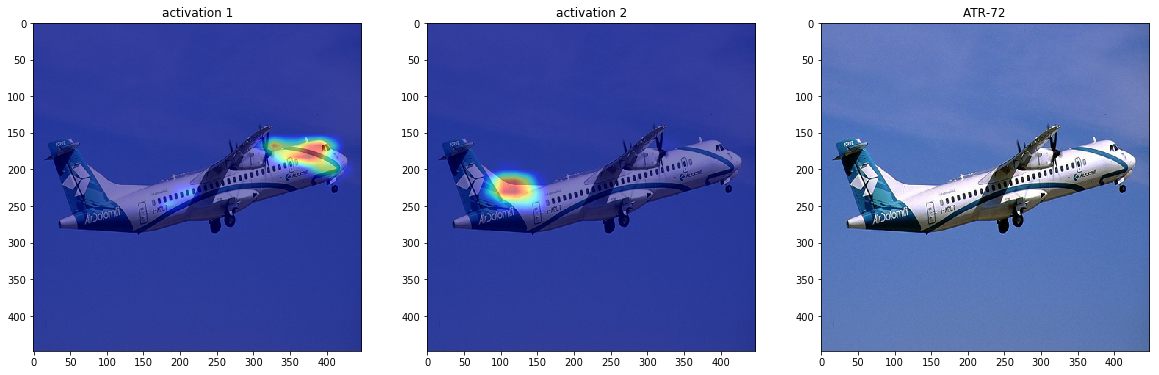

In [41]:
for i in range(10):
    draw_heatmap(get_processed_img(test_imgs[i]))

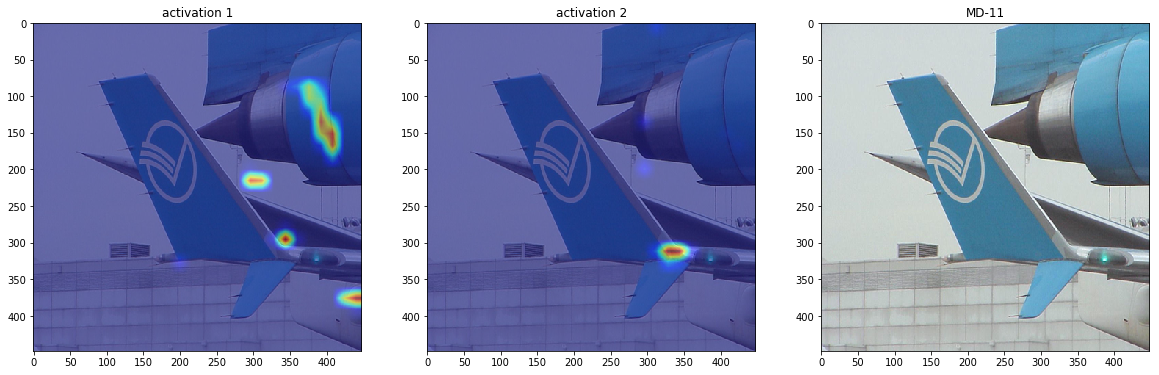

In [33]:
draw_heatmap(get_processed_img(test_imgs[10]))

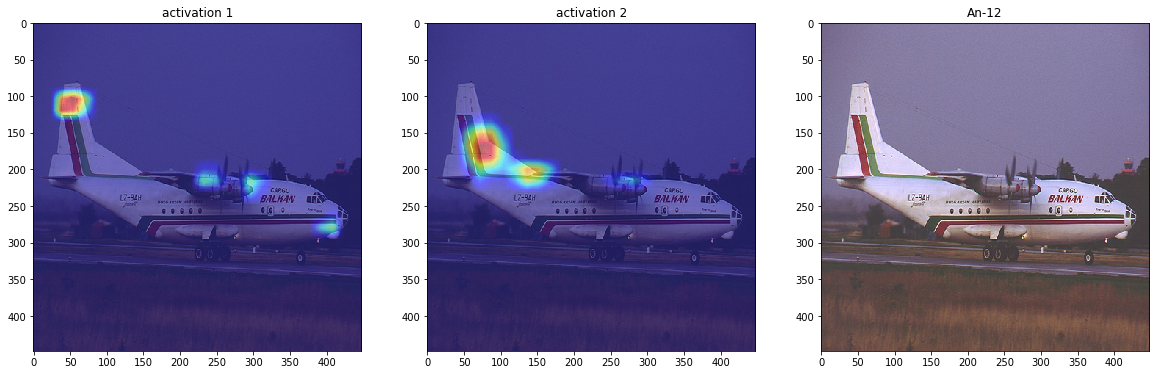

In [34]:
draw_heatmap(get_processed_img(test_imgs[5]))

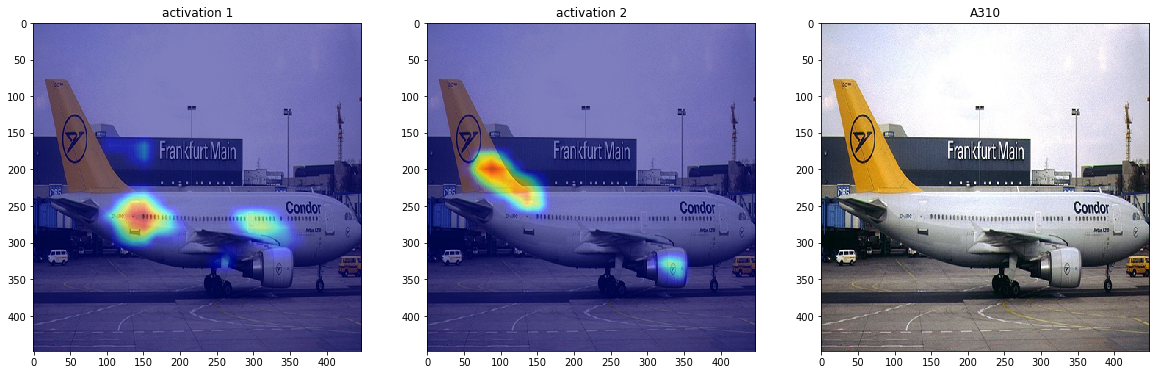

In [35]:
draw_heatmap(get_processed_img(test_imgs[8]))

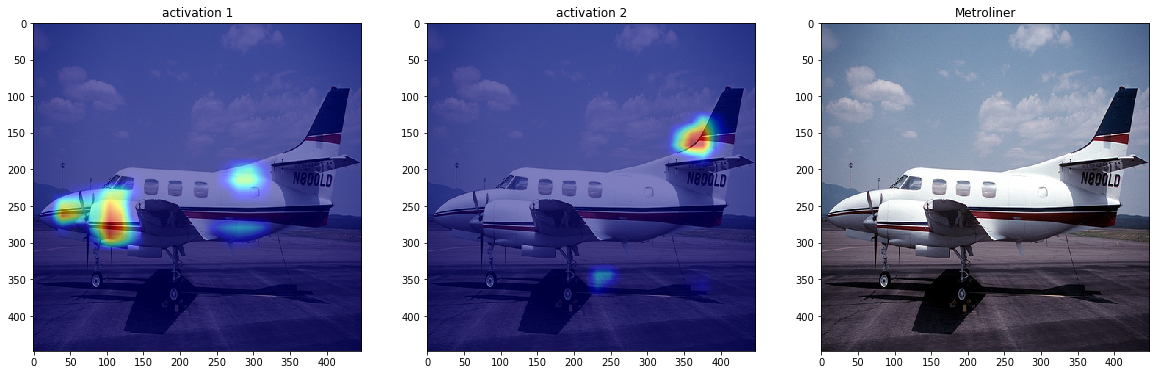

In [36]:
draw_heatmap(get_processed_img(test_imgs[13]))

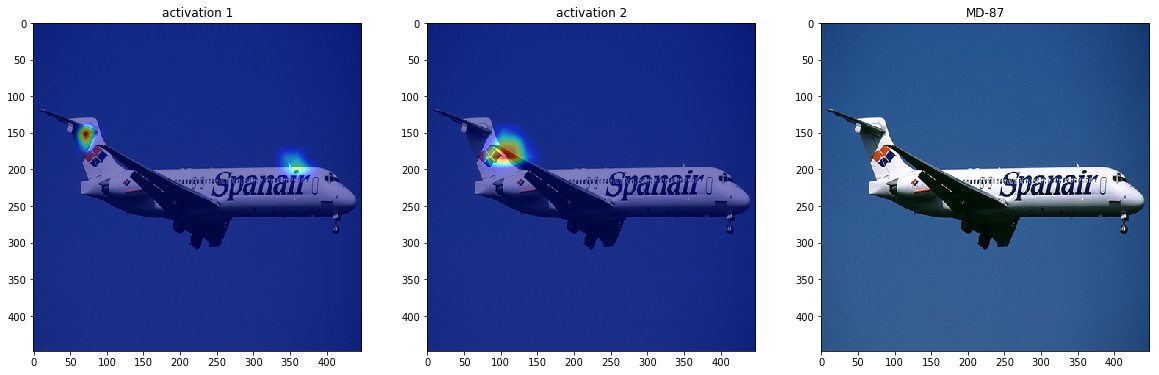

In [37]:
draw_heatmap(get_processed_img(test_imgs[14]))